/Users/alexo/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alexo/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Empatica Model - Inertia: 5650.25442067735
Samsung Model - Inertia: 1059.5000904694427


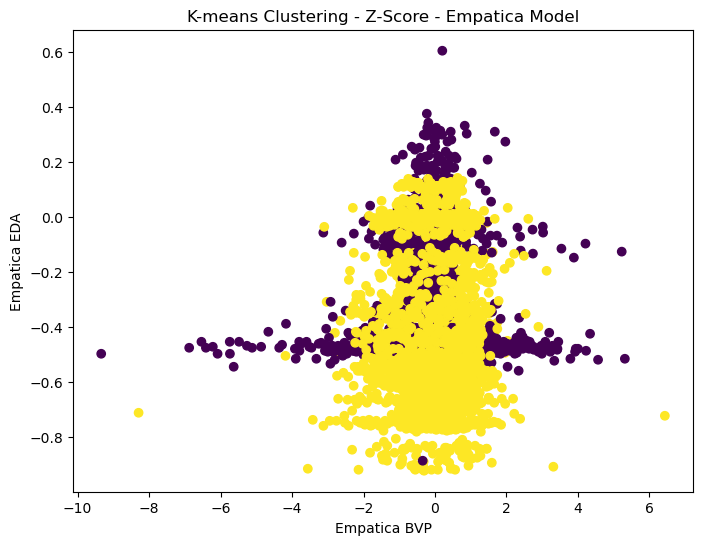

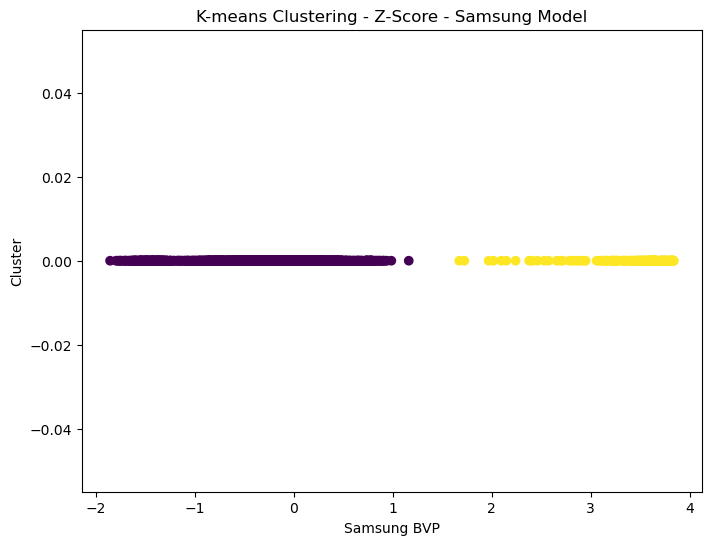

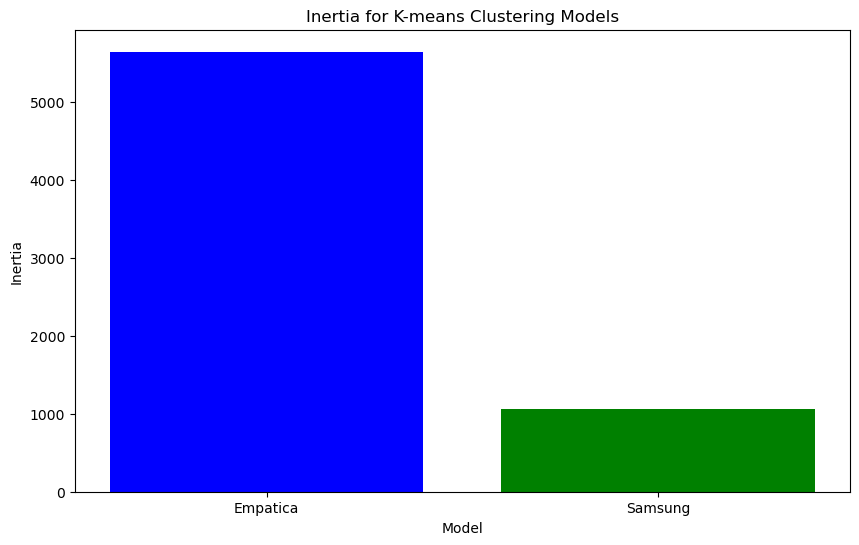

In [7]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Define file paths
training_file_path = "./data/6-data-split/z-score/a_training.csv"
testing_file_path = "./data/6-data-split/z-score/b_testing.csv"
validation_file_path = "./data/6-data-split/z-score/c_validation.csv"

# Load the dataset
training_df = pd.read_csv(training_file_path)
testing_df = pd.read_csv(testing_file_path)
validation_df = pd.read_csv(validation_file_path)

# Combine training and testing data for K-means clustering
combined_df = pd.concat([training_df, validation_df], ignore_index=True)

# Extract features for clustering
X_empatica = combined_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
X_samsung = combined_df[["samsung_bvp"]]

# Define the number of clusters
n_clusters_empatica = 2
n_clusters_samsung = 2

# Initialize K-means models
kmeans_empatica = KMeans(n_clusters=n_clusters_empatica, random_state=42)
kmeans_samsung = KMeans(n_clusters=n_clusters_samsung, random_state=42)

# Fit K-means models
kmeans_empatica.fit(X_empatica)
kmeans_samsung.fit(X_samsung)

# Predict cluster labels
y_pred_empatica = kmeans_empatica.predict(X_empatica)
y_pred_samsung = kmeans_samsung.predict(X_samsung)

# Calculate inertia for each model
inertia_empatica = kmeans_empatica.inertia_
inertia_samsung = kmeans_samsung.inertia_

# Print the inertia values
print(f"Empatica Model - Inertia: {inertia_empatica}")
print(f"Samsung Model - Inertia: {inertia_samsung}")

# Visualize the cluster assignments for Empatica Model
plt.figure(figsize=(8, 6))
plt.scatter(
    X_empatica["empatica_bvp"],
    X_empatica["empatica_eda"],
    c=y_pred_empatica,
    cmap="viridis",
)
plt.title("K-means Clustering - Z-Score - Empatica Model")
plt.xlabel("Empatica BVP")
plt.ylabel("Empatica EDA")
plt.show()

# Visualize the cluster assignments for Samsung Model
plt.figure(figsize=(8, 6))
plt.scatter(
    X_samsung["samsung_bvp"], [0] * len(X_samsung), c=y_pred_samsung, cmap="viridis"
)
plt.title("K-means Clustering - Z-Score - Samsung Model")
plt.xlabel("Samsung BVP")
plt.ylabel("Cluster")
plt.show()

# Plotting the inertia for both models
plt.figure(figsize=(10, 6))
plt.bar(
    ["Empatica", "Samsung"],
    [inertia_empatica, inertia_samsung],
    color=["blue", "green"],
)
plt.xlabel("Model")
plt.ylabel("Inertia")
plt.title("Inertia for K-means Clustering Models")
plt.show()

/Users/alexo/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Empatica Model (PCA) - Inertia: 5386.309864855593


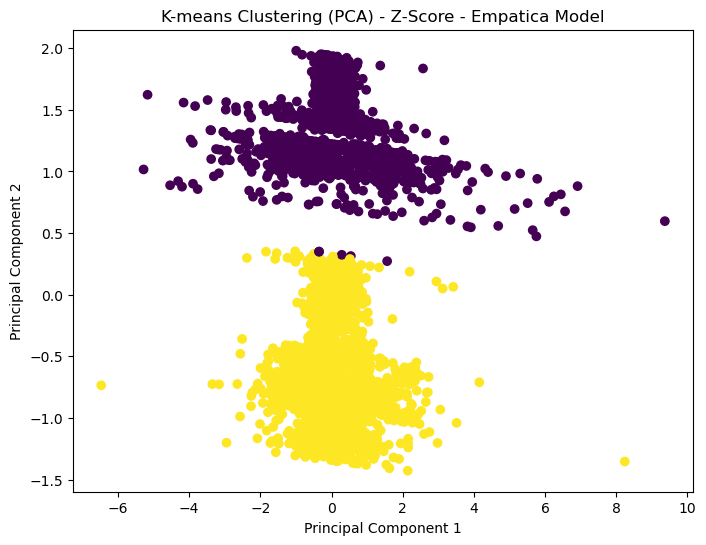

In [8]:
from sklearn.decomposition import PCA

# Apply PCA to the Empatica features
pca = PCA(n_components=2)  # Select the number of components you want to keep
X_empatica_pca = pca.fit_transform(X_empatica)

# Initialize K-means model
kmeans_empatica_pca = KMeans(n_clusters=n_clusters_empatica, random_state=42)

# Fit K-means model to the PCA-transformed data
kmeans_empatica_pca.fit(X_empatica_pca)

# Predict cluster labels
y_pred_empatica_pca = kmeans_empatica_pca.predict(X_empatica_pca)

# Calculate inertia for the PCA-transformed data
inertia_empatica_pca = kmeans_empatica_pca.inertia_

# Print the inertia value
print(f"Empatica Model (PCA) - Inertia: {inertia_empatica_pca}")

# Visualize the cluster assignments for Empatica Model (PCA)
plt.figure(figsize=(8, 6))
plt.scatter(
    X_empatica_pca[:, 0],
    X_empatica_pca[:, 1],
    c=y_pred_empatica_pca,
    cmap="viridis",
)
plt.title("K-means Clustering (PCA) - Z-Score - Empatica Model")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

/Users/alexo/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alexo/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alexo/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alexo/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

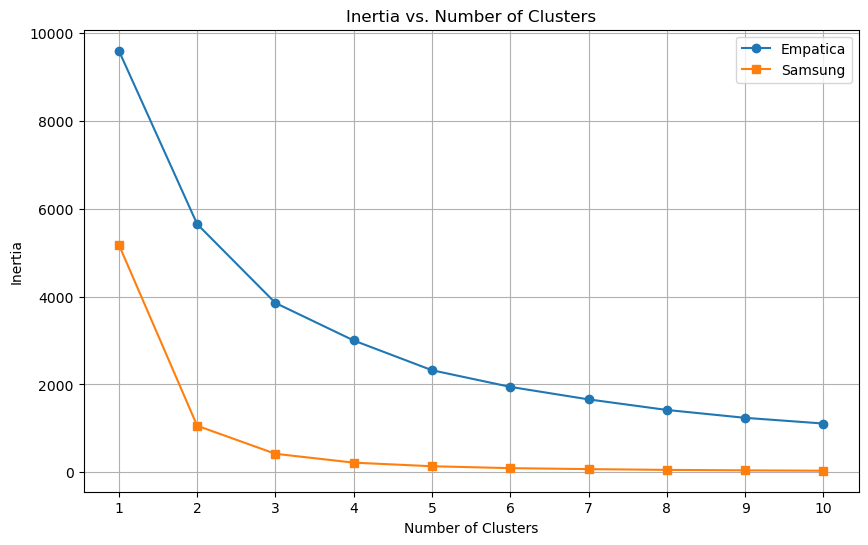

In [9]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define file paths
training_file_path = "./data/6-data-split/z-score/a_training.csv"
testing_file_path = "./data/6-data-split/z-score/b_testing.csv"
validation_file_path = "./data/6-data-split/z-score/c_validation.csv"

# Load the dataset
training_df = pd.read_csv(training_file_path)
testing_df = pd.read_csv(testing_file_path)
validation_df = pd.read_csv(validation_file_path)

# Combine training and testing data for K-means clustering
combined_df = pd.concat([training_df, validation_df], ignore_index=True)

# Extract features for clustering
X_empatica = combined_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
X_samsung = combined_df[["samsung_bvp"]]

# Define a range of number of clusters
num_clusters_range = range(1, 11)  # Try clusters from 1 to 10

# Initialize lists to store inertia values
inertia_empatica_values = []
inertia_samsung_values = []

# Fit K-means models and calculate inertia for each number of clusters
for k in num_clusters_range:
    kmeans_empatica = KMeans(n_clusters=k, random_state=42)
    kmeans_samsung = KMeans(n_clusters=k, random_state=42)
    kmeans_empatica.fit(X_empatica)
    kmeans_samsung.fit(X_samsung)
    inertia_empatica_values.append(kmeans_empatica.inertia_)
    inertia_samsung_values.append(kmeans_samsung.inertia_)

# Plot the inertia values
plt.figure(figsize=(10, 6))
plt.plot(num_clusters_range, inertia_empatica_values, marker="o", label="Empatica")
plt.plot(num_clusters_range, inertia_samsung_values, marker="s", label="Samsung")
plt.title("Inertia vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.xticks(num_clusters_range)
plt.legend()
plt.grid(True)
plt.show()